In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
sales1 = pd.read_csv('sales1.csv')
sales1

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [4]:
sales2 = pd.read_csv('sales2.csv')
sales2.fillna('')

,Title,Units sold,List price,Royalty
0,,,,
1,Sales report for Q4,,,
2,E-Book Reader US Store,,,
3,Pining for the Fisheries of Yore,80,3.5,14.98
4,Swimrand,1,2.99,0.14
5,The Bricklayer's Bible,17,3.5,5.15
6,The Duck Goes Here,34,2.99,5.78
7,The Tower Commission Report,4,9.5,6.2
8,US royalties (USD),,,32.25
9,,,,


### Challenge: first combine these sales together into a single dataframe, then compute how much money consumers spent on each book in each currency.

In [5]:
sales2a = sales2
sales2a['currency'] = sales2.Title.str.extract(r'\((.*?)\)').fillna(method='backfill')
sales2a = sales2a[((sales2['Units sold'].notnull()) & (sales2['List price'].notnull()) & (sales2['Royalty'].notnull()))]
sales2a = sales2a.rename(columns={'Title': 't','Units sold': 'n', 'List price': 'p', 'Royalty': 'r', 'currency': 'c'})
sales2a


,t,n,p,r,c
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD
13,Pining for the Fisheries of Yore,47.0,2.99,11.98,GBP
14,The Bricklayer's Bible,17.0,2.99,3.50,GBP
15,The Tower Commission Report,4.0,6.50,4.80,GBP
21,Swimrand,8.0,1.99,0.88,EUR
22,The Duck Goes Here,12.0,1.99,1.50,EUR


In [6]:
sales1a = sales1
sales1a['c'] = 'USD'
sales1a = sales1a.rename(columns={'Book title': 't','Number sold':'n', 'Sales price':'p', 'Royalty paid':'r'})
sales1a

,t,n,p,r,c
0,The Bricklayer’s Bible,8,2.99,0.55,USD
1,Swimrand,2,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28,2.99,0.55,USD
3,The Duck Goes Here,34,2.99,0.55,USD
4,The Tower Commission Report,4,11.50,4.25,USD


In [7]:
result = pd.concat([sales2a, sales1a])
result.t = result.t.str.lower()
result.t = result.t.str.replace('\'','')
result.t = result.t.str.replace('’','')
result['m'] = result.n * result.p
result = result.groupby(['t','c']).sum()
result

n      p      r       m
t                                c                               
pining for the fisheries of yore GBP   47.0   2.99  11.98  140.53
                                 USD  108.0   6.49  15.53  363.72
swimrand                         EUR    8.0   1.99   0.88   15.92
                                 USD    3.0   4.98   0.49    6.97
the bricklayers bible            GBP   17.0   2.99   3.50   50.83
                                 USD   25.0   6.49   5.70   83.42
the duck goes here               EUR   12.0   1.99   1.50   23.88
                                 USD   68.0   5.98   6.33  203.32
the tower commission report      GBP    4.0   6.50   4.80   26.00
                                 USD    8.0  21.00  10.45   84.00

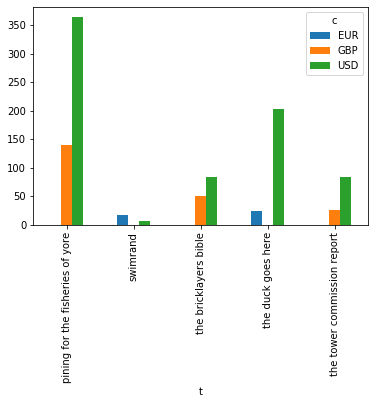

In [14]:
result['m'].unstack('c').fillna(0).plot(kind='bar')